In [1]:
!pip install yfinance pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 121.4 MB/s eta 0:00:00
  Installing build dependencies ... one
doneGetting requirements to build wheel ... 
donePreparing metadata (pyproject.toml) ... 
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 149.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 99.2 MB/s eta 0:00:00
doneel for peewee (pyproject.toml) ... 
  Created wheel for peewee: filename=peewee-3.18.1-cp310-cp310-linux_x86_64.whl size=300864 sha256=19e7396eaea4893e5b3730e76fc22da689c87d9698f9d1bafa3d0b2c2359da6d
  Stored in directory: /home/jovyan/.cach

Die Wachstumsrate von AAPL über die letzten 12 Monate beträgt: 5.02%
Der aktuelle Trend für AAPL ist: abwärts


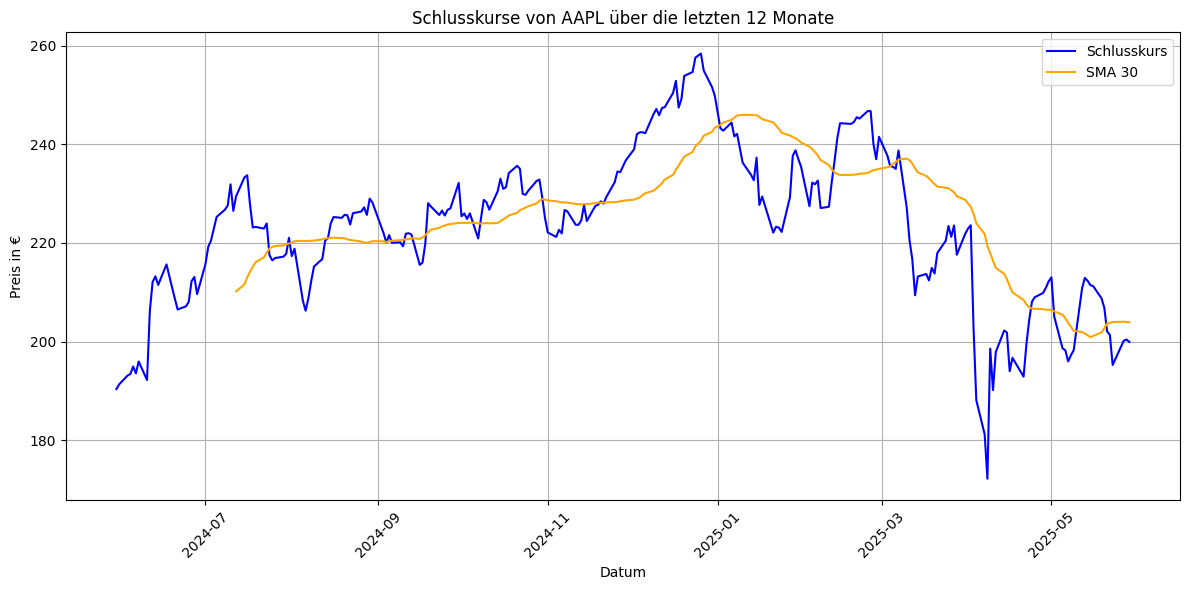

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Funktion, um die historischen Daten abzurufen
def get_historical_data(ticker):
    # Lade die Daten für das angegebene Tickersymbol
    stock = yf.Ticker(ticker)
    
    # Hole die historischen Preisdaten für die letzten 12 Monate
    hist = stock.history(period="1y")
    
    return hist

# Funktion zur Berechnung der Wachstumsrate
def calculate_growth_rate(df):
    if df is not None and not df.empty:
        # Anfangs- und Endkurs
        start_price = df['Close'].iloc[0]
        end_price = df['Close'].iloc[-1]

        # Wachstumsrate berechnen
        growth_rate = ((end_price - start_price) / start_price) * 100
        return growth_rate
    return None



# Hauptprogramm
ticker = "AAPL"  # Beispiel: Apple Inc.
historical_data = get_historical_data(ticker)
growth_rate = calculate_growth_rate(historical_data)

if growth_rate is not None:
    print(f"Die Wachstumsrate von {ticker} über die letzten 12 Monate beträgt: {growth_rate:.2f}%")
else:
    print("Konnte die Wachstumsrate nicht berechnen.")


# Berechnung des gleitenden Durchschnitts (SMA 30)
historical_data['SMA30'] = historical_data['Close'].rolling(window=30).mean()

# Bestimmung des Trends
if historical_data['Close'].iloc[-1] > historical_data['SMA30'].iloc[-1]:
    trend = "aufwärts"
else:
    trend = "abwärts"

print(f"Der aktuelle Trend für {ticker} ist: {trend}")

# Diagramm der Schlusskurse zeichnen
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], label='Schlusskurs', color='blue')
plt.plot(historical_data.index, historical_data['SMA30'], label='SMA 30', color='orange')
plt.title(f'Schlusskurse von {ticker} über die letzten 12 Monate')
plt.xlabel('Datum')
plt.ylabel('Preis in €')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()